# 特徵選取法

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression

def load_classification_example():
    filename='.\data_weight_multlfeatutes.xlsx'
    df = pd.read_excel(filename)
    labelencoder = LabelEncoder()
    df["性別"] = labelencoder.fit_transform(df["性別"]) # 將"性別"裡的字串自動轉換成數值
    df["手機品牌"] = labelencoder.fit_transform(df["手機品牌"]) # 將"手機品牌"裡的字串自動轉換成數值
    X = np.array(df[['身高', '體重', '手機品牌','體脂肪']])
    Y = np.array(df['性別'])
    return X, Y

### 刪除變異量最小的特徵資料

我們故意加一行特徵值都是0的資料進去X

In [2]:
X, Y = load_classification_example()
n,dim=X.shape
X = np.concatenate((X, np.zeros((n,1))),1)
print(X)

[[171.2  75.    0.   25.    0. ]
 [158.5  50.    0.   28.    0. ]
 [173.   72.    1.   15.    0. ]
 [178.   71.    1.   19.    0. ]
 [179.   75.    2.   20.    0. ]
 [158.   54.    0.   24.    0. ]
 [170.   67.    1.   20.    0. ]
 [180.   78.    1.   12.    0. ]
 [171.   65.    0.   10.    0. ]
 [174.   70.    0.   17.    0. ]
 [168.   68.    2.   21.    0. ]
 [182.   75.    1.    8.    0. ]
 [177.   78.    1.   10.    0. ]
 [170.   70.    0.   19.    0. ]
 [158.5  50.    0.   24.    0. ]
 [158.   54.    0.   20.    0. ]
 [162.   58.    2.   25.    0. ]
 [160.   60.    2.   22.    0. ]
 [154.   45.    2.   19.    0. ]
 [160.   55.    0.   21.    0. ]
 [152.   50.    0.   22.    0. ]
 [180.   75.    2.   19.    0. ]
 [175.   80.    2.   23.    0. ]
 [179.   80.    0.   21.    0. ]]


**變異量的閾值我們採用伯努利分布(Bernoulli Distribution)的變異數**<br>
**Recall: 伯努利分布** ($X \sim Bernuulli(p)$)<br>
$$
f(x)=p^x(1-p)^{1-x}, x=0,1
$$
<br>
$$
E(X)= \sum_{x=0,1} xf(x) = 0 \times p^0(1-p)^{1} + 1 \times p^1(1-p)^{0} = 0 + p = p <br>
$$
<br>
$$
Var(X)=\sum_{x=0,1}(x-E(X))^2 f(x) = (0-p)^2\times p^0(1-p)^{1} + (1-p)^2\times p^1(1-p)^{0} = p^2\times(1-p)^{1} + (1-p)^2\times p^1 = p(1-p)
$$
<br>
所以我們假設每個變數被選出來的情形和伯努利分布一樣(成功1和失敗0)<br>
假設被選中的機率是0.9 <br>
所以閾值設定在$0.9\times(1-0.9)$

In [4]:
from sklearn.feature_selection import VarianceThreshold
X, Y = load_classification_example()
n,dim=X.shape
X = np.concatenate((X, np.zeros((n,1))),1)

th = 0.9 * (1-0.9)
sel = VarianceThreshold(threshold=th)
sel.fit(X)

print(X)

X_ = sel.transform(X)
print(X_)


[[171.2  75.    0.   25.    0. ]
 [158.5  50.    0.   28.    0. ]
 [173.   72.    1.   15.    0. ]
 [178.   71.    1.   19.    0. ]
 [179.   75.    2.   20.    0. ]
 [158.   54.    0.   24.    0. ]
 [170.   67.    1.   20.    0. ]
 [180.   78.    1.   12.    0. ]
 [171.   65.    0.   10.    0. ]
 [174.   70.    0.   17.    0. ]
 [168.   68.    2.   21.    0. ]
 [182.   75.    1.    8.    0. ]
 [177.   78.    1.   10.    0. ]
 [170.   70.    0.   19.    0. ]
 [158.5  50.    0.   24.    0. ]
 [158.   54.    0.   20.    0. ]
 [162.   58.    2.   25.    0. ]
 [160.   60.    2.   22.    0. ]
 [154.   45.    2.   19.    0. ]
 [160.   55.    0.   21.    0. ]
 [152.   50.    0.   22.    0. ]
 [180.   75.    2.   19.    0. ]
 [175.   80.    2.   23.    0. ]
 [179.   80.    0.   21.    0. ]]
[[171.2  75.    0.   25. ]
 [158.5  50.    0.   28. ]
 [173.   72.    1.   15. ]
 [178.   71.    1.   19. ]
 [179.   75.    2.   20. ]
 [158.   54.    0.   24. ]
 [170.   67.    1.   20. ]
 [180.   78.    1.

## 單變量特徵選擇
- 「分類」特徵選取: 我們介紹了利用卡方檢定(Chi-square)來進行分類務的特徵選取<br>

在scikit-learn的 feature_selection模組依據「迴歸」和「分類」任務提供程式碼:
- 「迴歸」特徵選取: 相關mutual_info_regression係數(𝑟)(```r_regression```)、 F-statistic(```f_regression```)、Mutual information(``````) <br>
- 「分類」特徵選取: 卡方統計量(```chi2```)、ANOVA F-value(```f_classif```)、Mutual information(```mutual_info_classif```)<br>






### 性別分類
```
X = np.array(df[['身高', '體重', '手機品牌','體脂肪']])
Y = np.array(df['性別'])
```

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

X, Y = load_classification_example()

for sele_k in [3,2,1]:
    print('------')
    print('選{}個特徵'.format(sele_k))

    p  = SelectKBest(chi2, k=sele_k).fit(X, Y)
    print('chi2:{}'.format(p.scores_))
    print('selecation features:{}'.format(p.get_feature_names_out()))

    p = SelectKBest(f_classif, k=sele_k).fit(X, Y)
    print('ANOVA F-value:{}'.format(p.scores_))
    print('selecation features:{}'.format(p.get_feature_names_out()))

    p = SelectKBest(mutual_info_classif, k=sele_k).fit(X, Y)
    print('Mutual information:{}'.format(p.scores_))
    print('selecation features:{}'.format(p.get_feature_names_out()))

------
選3個特徵
chi2:[ 9.93211073 35.59318519  0.48        8.83678161]
selecation features:['x0' 'x1' 'x3']
ANOVA F-value:[103.96594136 106.65274191   0.51968504   8.73095189]
selecation features:['x0' 'x1' 'x3']
Mutual information:[0.68286863 0.66897974 0.04695142 0.11600355]
selecation features:['x0' 'x1' 'x3']
------
選2個特徵
chi2:[ 9.93211073 35.59318519  0.48        8.83678161]
selecation features:['x0' 'x1']
ANOVA F-value:[103.96594136 106.65274191   0.51968504   8.73095189]
selecation features:['x0' 'x1']
Mutual information:[0.68286863 0.65509085 0.01203842 0.08625818]
selecation features:['x0' 'x1']
------
選1個特徵
chi2:[ 9.93211073 35.59318519  0.48        8.83678161]
selecation features:['x1']
ANOVA F-value:[103.96594136 106.65274191   0.51968504   8.73095189]
selecation features:['x1']
Mutual information:[0.68286863 0.66897974 0.         0.12503133]
selecation features:['x0']


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression, f_regression, mutual_info_regression

X, Y = load_classification_example()

clf = LogisticRegression()
clf.fit(X,Y)
print('All features: accuracy :{}'.format(clf.score(X, Y)))

for sele_k in [3,2,1]:
    print('------')
    print('選{}個特徵'.format(sele_k))
    p  = SelectKBest(r_regression, k=sele_k).fit(X, Y)
    X_ = p.transform(X)
    clf = LogisticRegression()
    clf.fit(X_,Y)
    print('feature selection (chi2): accuracy :{}'.format(clf.score(X_, Y)))

    p = SelectKBest(f_regression, k=sele_k).fit(X, Y)
    X_ = p.transform(X)
    clf = LogisticRegression()
    clf.fit(X_,Y)
    print('feature selection (ANOVA F-value): accuracy :{}'.format(clf.score(X_, Y)))

    p = SelectKBest(mutual_info_regression, k=sele_k).fit(X, Y)
    X_ = p.transform(X)
    clf = LogisticRegression()
    clf.fit(X_,Y)
    print('feature selection (Mutual information): accuracy :{}'.format(clf.score(X_, Y)))


All features: accuracy :1.0
------
選3個特徵
feature selection (chi2): accuracy :1.0
feature selection (ANOVA F-value): accuracy :1.0
feature selection (Mutual information): accuracy :1.0
------
選2個特徵
feature selection (chi2): accuracy :1.0
feature selection (ANOVA F-value): accuracy :1.0
feature selection (Mutual information): accuracy :1.0
------
選1個特徵
feature selection (chi2): accuracy :1.0
feature selection (ANOVA F-value): accuracy :1.0
feature selection (Mutual information): accuracy :1.0


## 順序特徵選擇(Sequential Feature Selection)
sklearn目前只提供
「向前順序特徵選取法(forward sequential feature selection)」
和
「向後順序特徵選取法(backward sequential feature selection)」

### 性別分類
```
X = np.array(df[['身高', '體重', '手機品牌','體脂肪']])
Y = np.array(df['性別'])
```

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

X, Y = load_classification_example()
feature_names = np.array(['身高', '體重', '手機品牌','體脂肪'])

clf = LogisticRegression()
print('基於LogisticRegression')
for sele_k in [3,2,1]:
    print('------')
    print('選{}個特徵'.format(sele_k))
    
    sfs_forward = SequentialFeatureSelector(
        clf, 
        n_features_to_select=sele_k, 
        direction="forward"
        ).fit(X, Y)
    print("向前順序特徵選取法:{}".format(feature_names[sfs_forward.get_support()]))
    
    sfs_backward = SequentialFeatureSelector(
        clf, 
        n_features_to_select=sele_k, 
        direction="backward"
        ).fit(X, Y)
    print("向後順序特徵選取法:{}".format(feature_names[sfs_backward.get_support()]))



基於LogisticRegression
------
選3個特徵
向前順序特徵選取法:['身高' '體重' '手機品牌']
向後順序特徵選取法:['體重' '手機品牌' '體脂肪']
------
選2個特徵
向前順序特徵選取法:['身高' '體重']
向後順序特徵選取法:['體重' '體脂肪']
------
選1個特徵
向前順序特徵選取法:['身高']
向後順序特徵選取法:['體重']


In [11]:
from sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector
X, Y = load_classification_example()
feature_names = np.array(['身高', '體重', '手機品牌','體脂肪'])
clf = QuadraticDiscriminantAnalysis()
print('基於QuadraticDiscriminantAnalysis')
for sele_k in [3,2,1]:
    print('------')
    print('選{}個特徵'.format(sele_k))
    
    sfs_forward = SequentialFeatureSelector(
        clf, 
        n_features_to_select=sele_k, 
        direction="forward"
        ).fit(X, Y)
    print("向前順序特徵選取法:{}".format(feature_names[sfs_forward.get_support()]))
    
    sfs_backward = SequentialFeatureSelector(
        clf, 
        n_features_to_select=sele_k, 
        direction="backward"
        ).fit(X, Y)
    print("向後順序特徵選取法:{}".format(feature_names[sfs_backward.get_support()]))


基於QuadraticDiscriminantAnalysis
------
選3個特徵
向前順序特徵選取法:['身高' '體重' '體脂肪']
向後順序特徵選取法:['身高' '手機品牌' '體脂肪']
------
選2個特徵
向前順序特徵選取法:['身高' '體重']
向後順序特徵選取法:['身高' '體脂肪']
------
選1個特徵
向前順序特徵選取法:['身高']
向後順序特徵選取法:['身高']


假設我們基於<br>
**Logistic Regression 和 向後順序特徵選取法('選三個特徵') 後進行分類**

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

X, Y = load_classification_example()
feature_names = np.array(['身高', '體重', '手機品牌','體脂肪'])

clf = LogisticRegression()
sfs_backward = SequentialFeatureSelector(
        clf, 
        n_features_to_select=3, 
        direction="backward"
        ).fit(X, Y)
X_ = sfs_backward.transform(X)

clf.fit(X_,Y)
print('LogisticRegression + feature selection (向後順序特徵選取法 3 features): accuracy :{}'.format(clf.score(X_, Y)))

LogisticRegression + feature selection (向後順序特徵選取法 3 features): accuracy :1.0


# 利用sklearn內建的資料庫來測試速度
digits在Sklean是一個1797張圖片的數字資料庫。<br>
我們將利用它來測試不同特徵選取的速度。<br>

我們設定選擇 10,20,30,40,50,60 個特徵

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
Y = digits.target
print(X.shape)

(1797, 64)


## 單變量特徵選擇(chi2) + QuadraticDiscriminantAnalysis

In [14]:
from sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import time 
import warnings
warnings.filterwarnings("ignore")

digits = load_digits()
X = digits.data
Y = digits.target

st = time.time()
clf = QuadraticDiscriminantAnalysis()
clf.fit(X,Y)
print('Time for all features and training model: {}s'.format(time.time()-st))
print('accuracy :{}'.format(clf.score(X, Y)))
acc_chi2 = []
for sele_k in [10,20,30,40,50,60]:
    print('------')
    print('選{}個特徵'.format(sele_k))
    st = time.time()
    p  = SelectKBest(chi2, k=sele_k).fit(X, Y)
    X_ = p.transform(X)
    clf = QuadraticDiscriminantAnalysis()
    clf.fit(X_,Y)
    print('Time for selecting features and training model: {:5f}s'.format(time.time()-st))
    print('feature selection (chi2): accuracy :{:5f}'.format(clf.score(X_, Y)))
    acc_chi2.append(clf.score(X_, Y))

Time for all features and training model: 0.011510372161865234s
accuracy :0.9321090706733445
------
選10個特徵
Time for selecting features and training model: 0.005000s
feature selection (chi2): accuracy :0.100723
------
選20個特徵
Time for selecting features and training model: 0.005004s
feature selection (chi2): accuracy :0.100723
------
選30個特徵
Time for selecting features and training model: 0.007004s
feature selection (chi2): accuracy :0.915415
------
選40個特徵
Time for selecting features and training model: 0.007509s
feature selection (chi2): accuracy :0.932666
------
選50個特徵
Time for selecting features and training model: 0.010581s
feature selection (chi2): accuracy :0.953255
------
選60個特徵
Time for selecting features and training model: 0.010515s
feature selection (chi2): accuracy :0.934335


## 順序特徵選擇 + QuadraticDiscriminantAnalysis

In [15]:
# from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.datasets import load_digits
import time 
import warnings
warnings.filterwarnings("ignore")

digits = load_digits()
X = digits.data
Y = digits.target

st = time.time()
clf = QuadraticDiscriminantAnalysis()
clf.fit(X,Y)
print('Time for all features and training model: {:5f}s'.format(time.time()-st))
print('accuracy :{:5f}'.format(clf.score(X, Y)))
acc_forward,acc_backward = [],[]
for sele_k in [10,20,30,40,50,60]:
    print('------')
    print('選{}個特徵'.format(sele_k))
    st = time.time()
    sfs_forward = SequentialFeatureSelector(
        clf, 
        n_features_to_select=sele_k, 
        direction="forward"
        ).fit(X, Y)
    X_ = sfs_forward.transform(X)
    clf = QuadraticDiscriminantAnalysis()
    clf.fit(X_,Y)
    print('Time for 向前順序特徵選取法 and training model: {:5f}s'.format(time.time()-st))
    print('accuracy :{:5f}'.format(clf.score(X_, Y)))
    acc_forward.append(clf.score(X_, Y))

    sfs_backward = SequentialFeatureSelector(
        clf, 
        n_features_to_select=sele_k, 
        direction="backward"
        ).fit(X, Y)
    X_ = sfs_backward.transform(X)
    clf = QuadraticDiscriminantAnalysis()
    clf.fit(X_,Y)
    print('Time for 向後順序特徵選取法 and training model: {:5f}s'.format(time.time()-st))
    print('accuracy :{:5f}'.format(clf.score(X_, Y)))
    acc_backward.append(clf.score(X_, Y))



Time for all features and training model: 0.011515s
accuracy :0.932109
------
選10個特徵
Time for 向前順序特徵選取法 and training model: 9.447180s
accuracy :0.907067
Time for 向後順序特徵選取法 and training model: 97.168010s
accuracy :0.932666
------
選20個特徵
Time for 向前順序特徵選取法 and training model: 20.288666s
accuracy :0.987201
Time for 向後順序特徵選取法 and training model: 102.141710s
accuracy :0.986088
------
選30個特徵
Time for 向前順序特徵選取法 and training model: 27.915689s
accuracy :0.994992
Time for 向後順序特徵選取法 and training model: 103.831202s
accuracy :0.991096
------
選40個特徵
Time for 向前順序特徵選取法 and training model: 37.867090s
accuracy :0.992209
Time for 向後順序特徵選取法 and training model: 101.344768s
accuracy :0.983862
------
選50個特徵
Time for 向前順序特徵選取法 and training model: 45.819097s
accuracy :0.990540
Time for 向後順序特徵選取法 and training model: 90.395336s
accuracy :0.898720
------
選60個特徵
Time for 向前順序特徵選取法 and training model: 51.237122s
accuracy :0.942682
Time for 向後順序特徵選取法 and training model: 66.805531s
accuracy :0.928770


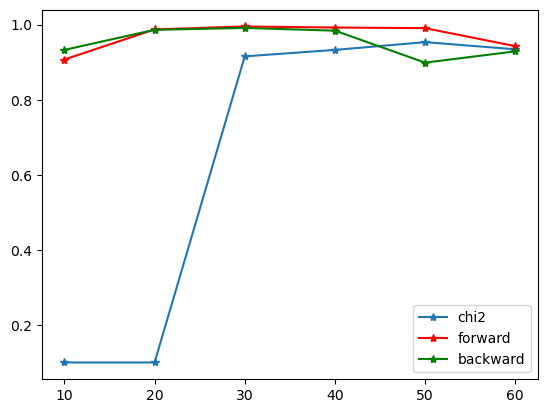

In [19]:
plt.plot([10,20,30,40,50,60],acc_chi2,'*-', label='chi2')
plt.plot([10,20,30,40,50,60],acc_forward,'r*-', label='forward')
plt.plot([10,20,30,40,50,60],acc_backward,'g*-', label='backward')
plt.legend()

|花費時間|特徵選取方法|特徵數|正確率|
|:-:|:-:|:-:|:-:|
|0.011510|無|64|0.932|
|0.005000|chi2|10|0.100723|
|0.005004|chi2|20|0.100723|
|0.007004|chi2|30|0.915415|
|0.007509|chi2|40|0.932666|
|0.010581|chi2|50|0.953255|
|0.010515|chi2|60|0.934335|


|花費時間|特徵選取方法|特徵數|正確率|
|:-:|:-:|:-:|:-:|
|9.447180|向前順序特徵選取法|10|0.907067|
|20.288666|向前順序特徵選取法|20|0.987201|
|27.915689|向前順序特徵選取法|30|**0.994992**|
|37.867090|向前順序特徵選取法|40|0.992209|
|45.819097|向前順序特徵選取法|50|0.990540|
|51.237122|向前順序特徵選取法|60|0.942682|

|花費時間|特徵選取方法|特徵數|正確率|
|:-:|:-:|:-:|:-:|
|97.168010|向後順序特徵選取法|10|0.907067|
|102.141710|向後順序特徵選取法|20|0.986088|
|103.831202|向後順序特徵選取法|30|0.991096|
|101.344768|向後順序特徵選取法|40|0.983862|
|90.395336|向後順序特徵選取法|50|0.898720|
|66.805531|向後順序特徵選取法|60|0.928770|

